# Module 1 The Neuron

A Neuron is just a numeric function. It takes in multipe inputs and produces a single output Similar to a real neuron. A real neuron has multiple dentrites which are connected to other neurons and a single axon. The dentrites take in input from the other neurons and if the neuron is triggered, it fires a signal through the axon. So what does our neuron do with the actual numeric input? It multiplies each input by a weight which represents how important the input is. If we're trying to predict the price of a house given certain attributes, it may be the case that number of square feet is most important in determining final price so that input would have a high weight. Alternatively, the air quality may have almost no effect on price so it would have a very low weight. 

The artificial neuron also has a bias. This is a constant value that is added on to the weighted inputs. In the context of our house, you can think of this as the minimum possible house price. For instance, we may never find a house cheaper than $10,000. Therefore, our neuron may have a bias of 10,000.

In [1]:
# This returns a random number between 0 and 1
from random import randint

class Neuron:
    def __init__(self, number_of_inputs):
        # These are the weights we will multiply by each input
        self.weights = [randint(0, 10000) for i in range(number_of_inputs)]
        self.bias = 10000

        
    def predict(self, inputs):
        """
            Predict is going to take in attributes about the 
            house such as number of rooms, square feet, miles 
            from city, and air quality. Then it multiplies each
            attribute by the weight or importance of it. Finally,
            it sums together all the weighted input to get a 
            price for the house.
            
            :inputs: a list of house attributes
            :returns: a house price prediction
        """
        # This multiplies each input by its corresponding weight
        weighted_inputs = [wgt * inp for (wgt, inp) in zip(self.weights, inputs)]
        
        # sum up all weighted inputs
        return sum(weighted_inputs) + self.bias
    
n1 = Neuron(4)

price = n1.predict([4, 2, 6, 1])


print('predicted price: ${}'.format(price))

predicted price: $55438


If we only have 1 weight then the neuron just represents a line. A neuron with 2 weights makes a plane. 3 weights and so on makes a hyper plane.

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt

# A neuron with one weight is just a line
n2 = Neuron(1)

x = range(10)

# this is the same as y = wx + b
# where w is the single weight and b is the bias
y = [n2.predict([x]) for x in range(10)]

plt.title('linear activation function')
plt.plot(x, y)

ModuleNotFoundError: No module named 'matplotlib'

## Activation function
What if instead of predicting the house price we wanted our neuron to decide whether or not we should buy the house. It no longer needs to output a price, but instead a probability it thinks that we should buy. An activation function changes the way we interpret the output of the neuron.


<IPython.core.display.Javascript object>


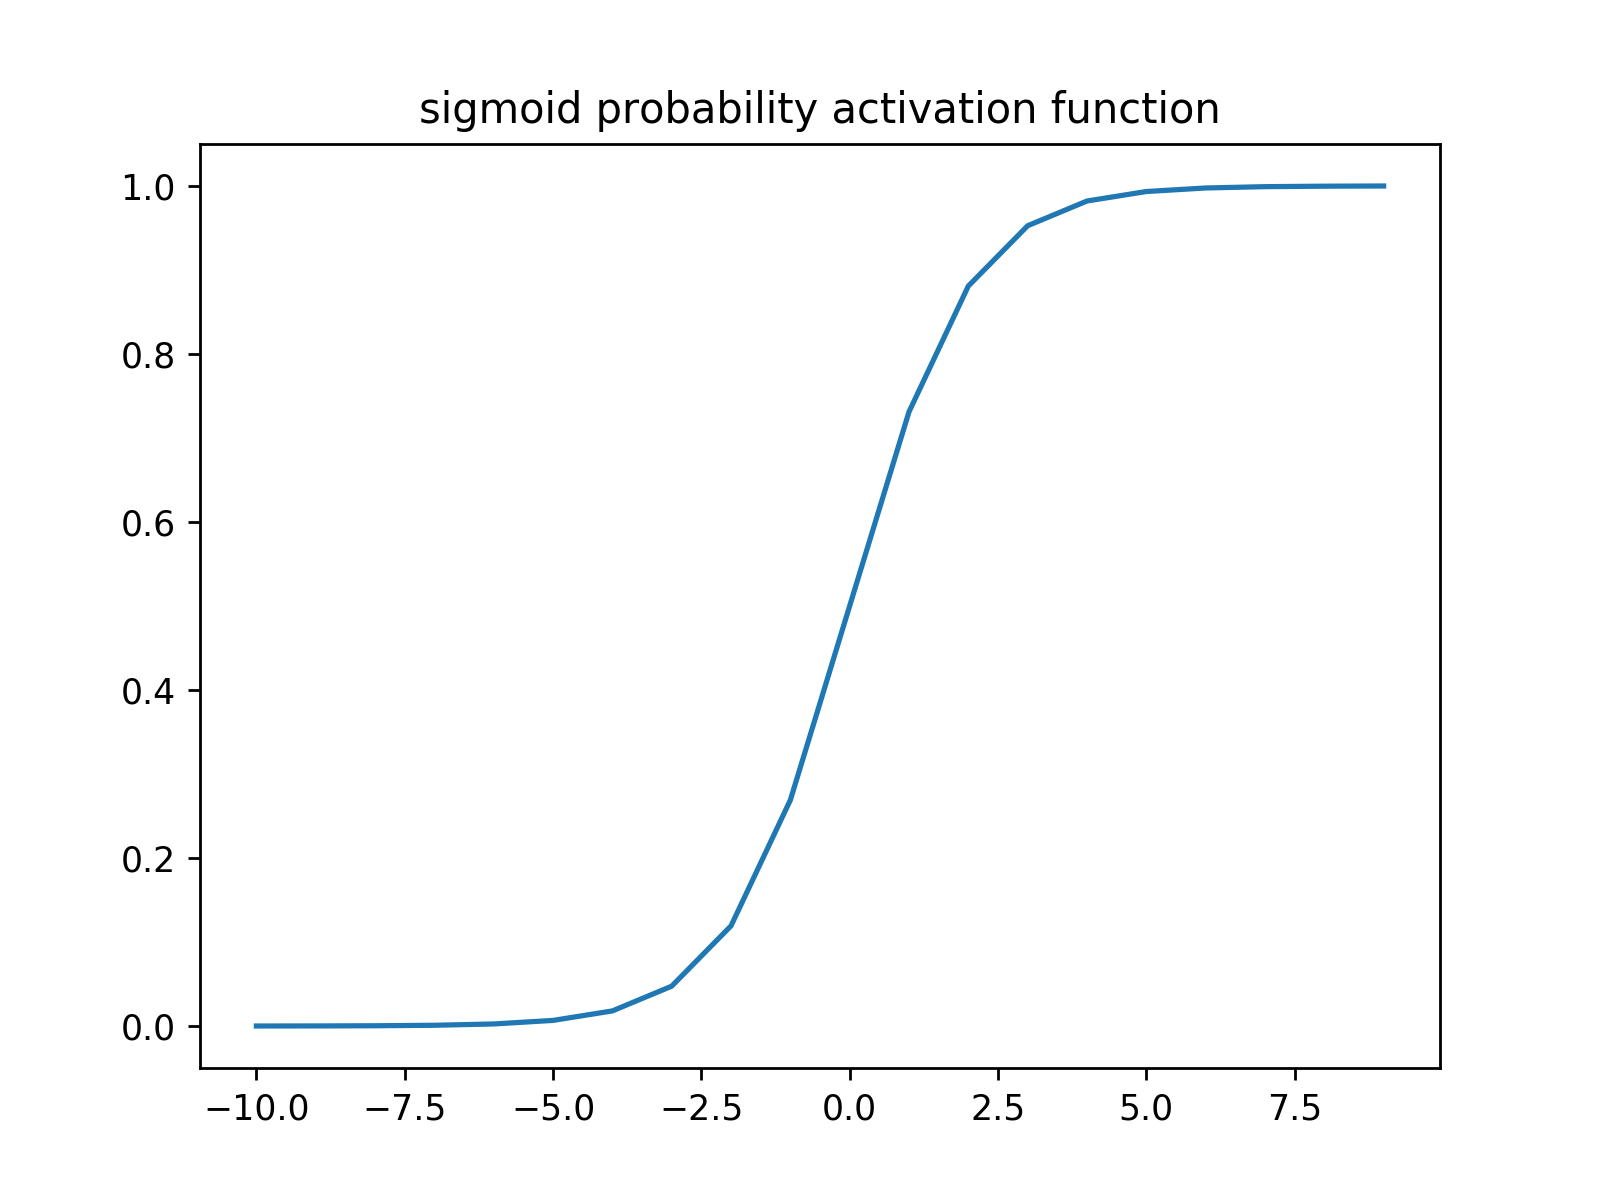

<module 'matplotlib.pyplot' from '/Users/haydenerickson/miniconda3/envs/nn-course/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [53]:
%matplotlib notebook
# e**x
from math import exp
from random import uniform
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    """
        The sigmoid function always outputs a number between 0 and 1
        Which we will use to represent our probability
        :x: a numeric input
        :returns: a value between 0 and 1
    """
    return 1/(1 + exp(-x))


def plot_sigmoid():
    x = np.arange(-10, 10)
    plt.title('sigmoid probability activation function')
    plt.plot(x, [sigmoid(i) for i in x])
    return plt
    
plot_sigmoid()

the predicted probability I will buy the house: 
 0.04028522403480506


<IPython.core.display.Javascript object>


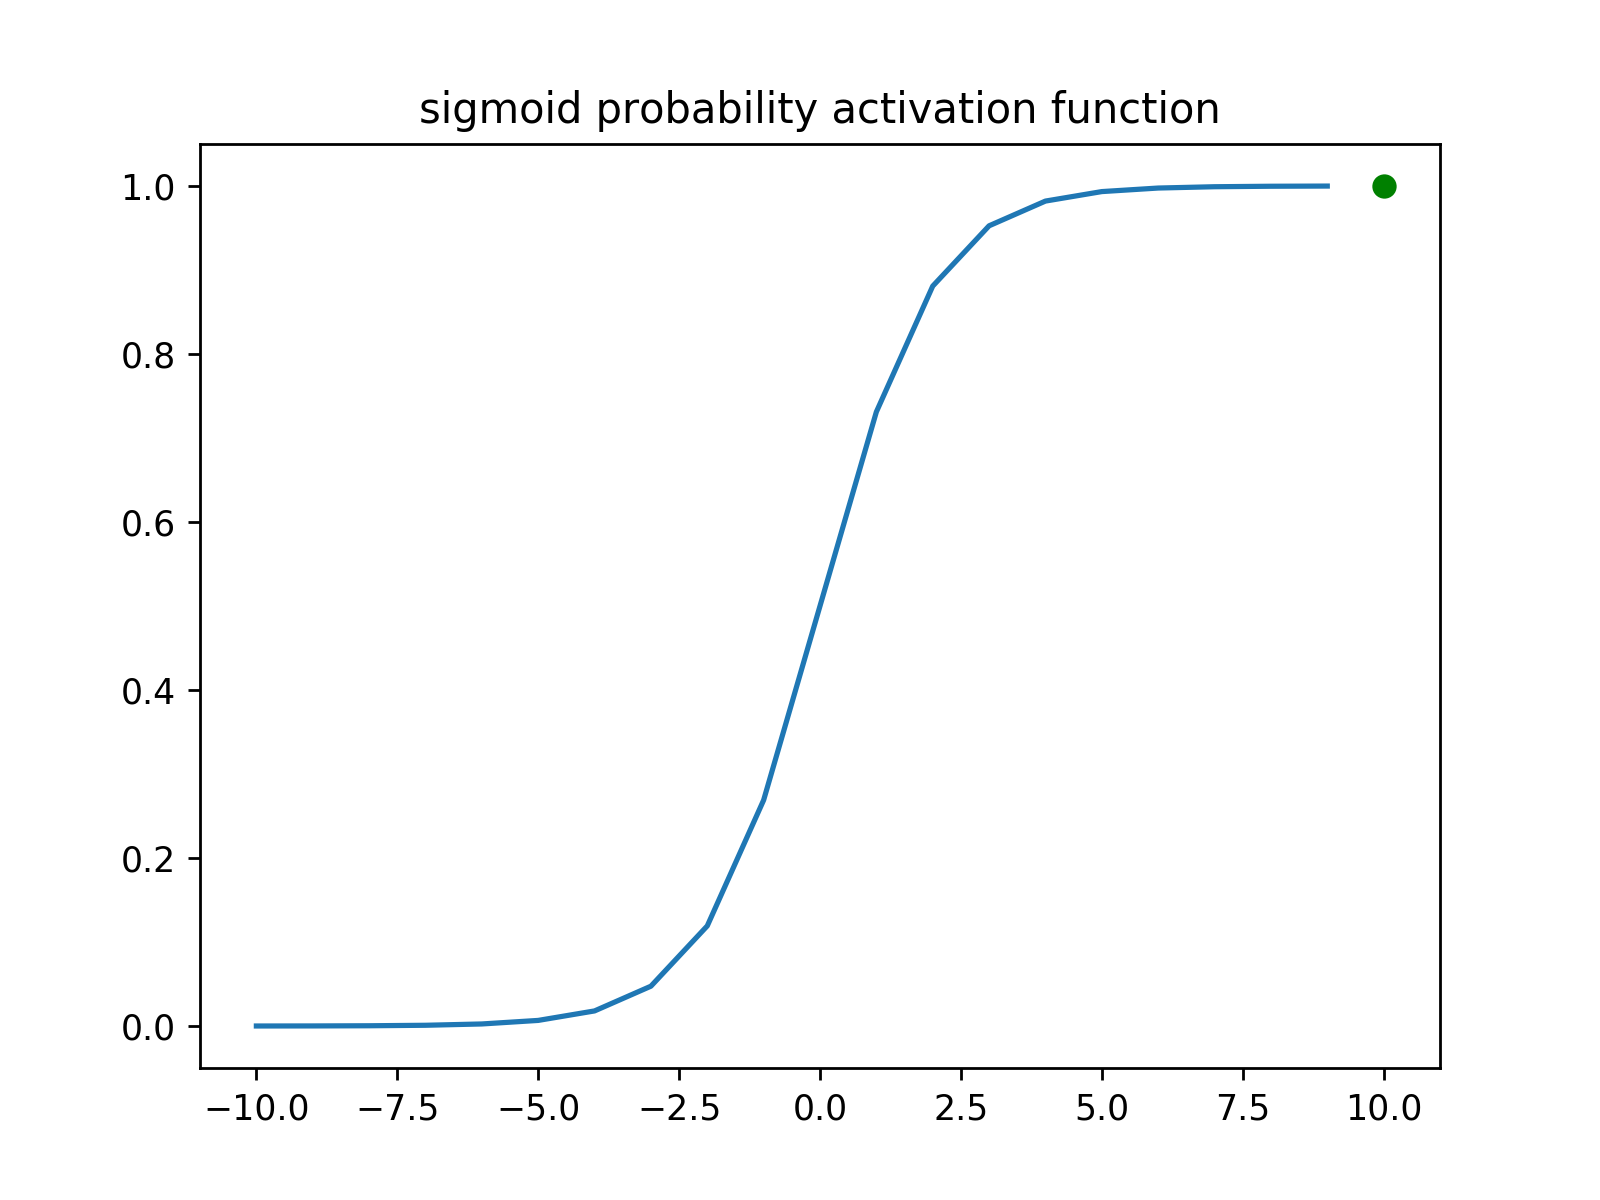

In [55]:
%matplotlib notebook

class ProbabilityNeuron:
    def __init__(self, number_of_inputs):
        """
            With our probability neuron, all our weights are randomly created to be between -1 and 1
            a negative weight would be something with an inverse relationship. For instance, as 
            distance from the city goes up, the probability that I will buy goes down
        """
        self.weights = [uniform(-1, 1) for i in range(number_of_inputs)]
        self.bias = uniform(-1, 1)
    
    def predict(self, inputs):
        # This multiplies each input by its corresponding weight
        weighted_inputs = [wgt * inp for (wgt, inp) in zip(self.weights, inputs)]
        
        # sum up all weighted inputs and add bias
        linear_output = sum(weighted_inputs) + self.bias
        
        # sigmoid represents our activation function
        return sigmoid(linear_output)

n3 = ProbabilityNeuron(4)

neuron_input = [5, 3, 9, 11]
probability_to_buy = n3.predict(neuron_input)

print('the predicted probability I will buy the house: \n {}'.format(probability_to_buy))

plt = plot_sigmoid()
weighted_input = n2.predict(neuron_input)
x = weighted_input

if weighted_input > 10: x = 10
if weighted_input < -10: x = -10
    
y = sigmoid(x)

plt.plot(x, y, 'go')